<a href="https://colab.research.google.com/github/Lexian-6/Helios/blob/main/Helios_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

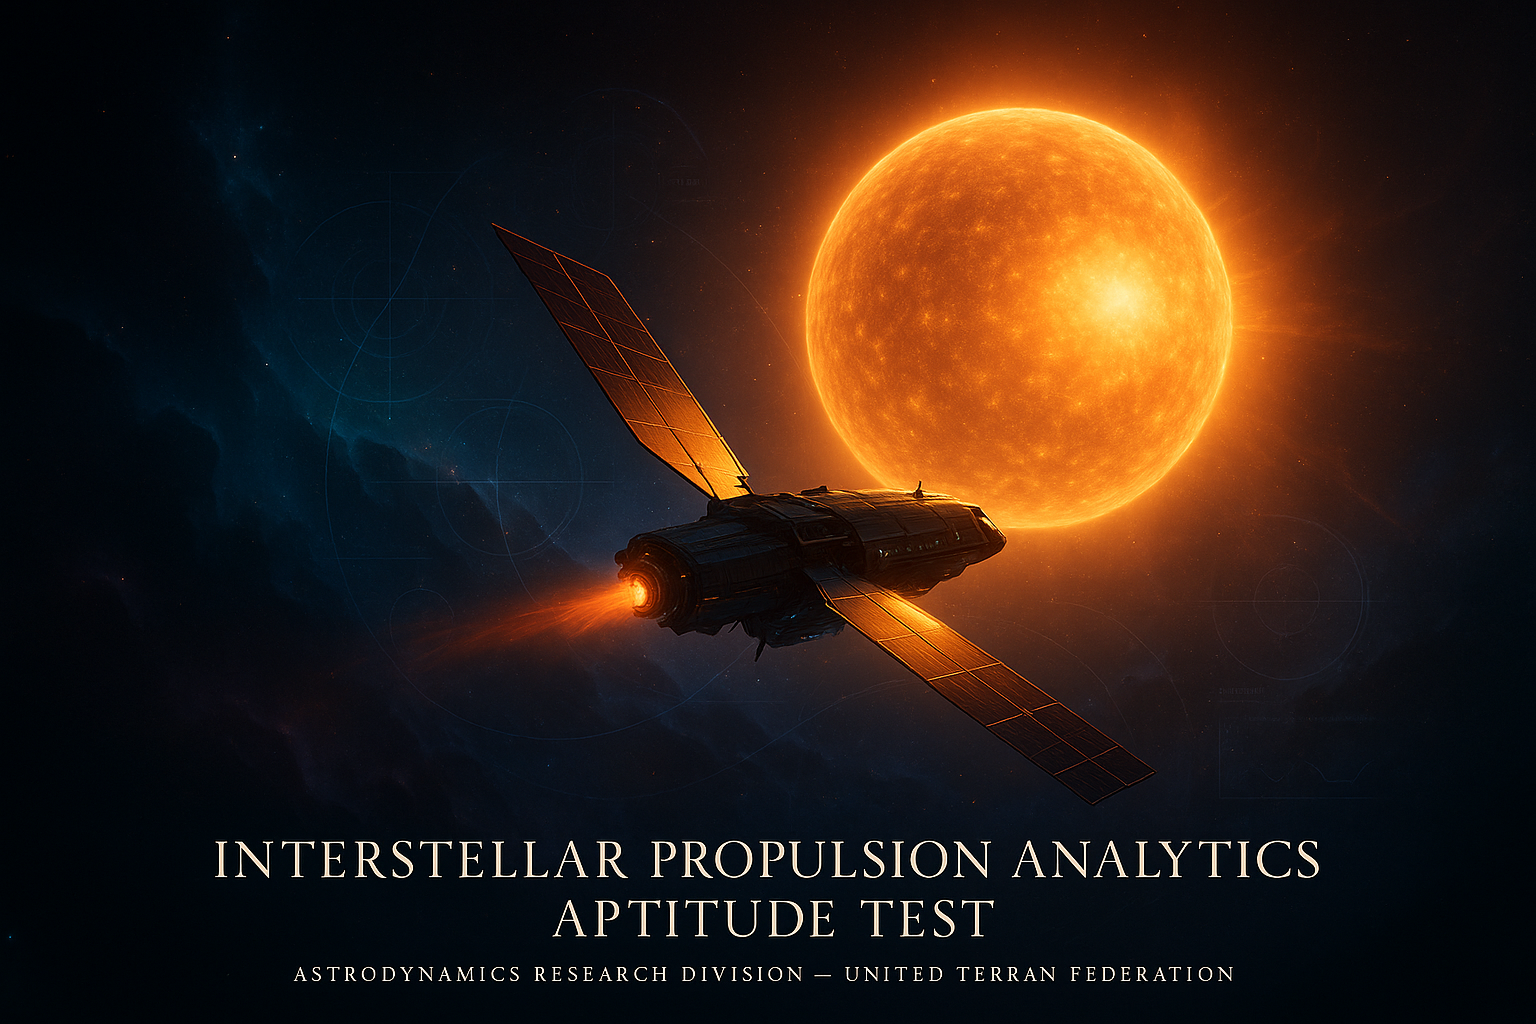

# 🌌 Interstellar Propulsion Analytics
### *Presented by the AstroDynamics Research Division*  
#### United Terran Federation · Luna Prime Headquarters  

---

> *“Between the stars, energy is the language of survival.”*

Welcome, Cadet Engineer.  
You are joining the **AstroDynamics Research Division (ADR)** — the research wing of the **United Terran Federation**.  
Your assignment: analyse the propulsion and energy systems of the **Helios-V Deep-Space Vessel**, operating within the **Epsilon Eridani** system.

This assessment evaluates your ability to:
- Analyse high-dimensional telemetry from an interstellar propulsion platform  
- Build quantitative models that predict system behaviour  
- Translate noisy data into actionable insight for long-range missions  

---

### Mission Context
Telemetry from two consecutive orbital cycles has been logged by the Helios-V:

| Cycle | Description | Collector Status |
|:--|:--|:--|
| **Cycle 1** | Nominal operation under stable stellar conditions | ✅ Active |
| **Cycle 2** | Nominal operation under stable stellar conditions | ✅ Active |
| **Cycle 3 (The next cycle)** | Expect slightly lower irradiance | ✅ Active |

The first two cycles contain full system telemetry, including irradiance and energy reserve readings.  
We are preparing for our third cycle, **the ship follows a pre-defined trajectory and speed profile**, but most data (like irradiance) are still unknown.

Your mission is to **forecast the Helios-V’s remaining energy at the end of Cycle 3**.

---

### Dataset Overview
Each record corresponds to a snapshot of the vessel’s propulsion and energy state.

| Column | Description |
|:--|:--|
| `mission_time` | Mission timestamp (local ship time). |
| `ship_speed_kps` | Ship velocity (km/s). |
| `reactor_output_A` | Main reactor output current (A). |
| `reactor_voltage_V` | Reactor bus voltage (V). |
| `stellar_irradiance_Wm2` | Incident stellar irradiance (W/m²). |
| `collector_A_W`, `collector_B_W`, `collector_C_W` | Output from three independent radiant-energy collectors (W). |
| `helio_remaining_energy` | Remaining Helios-core energy reserve (arbitrary units). |
| `orbital_inclination_deg` | Orbital inclination (°). |
| `orbital_longitude_deg` | Orbital longitude (°). |
| `orbital_altitude_km` | Altitude above the reference plane (km). |

> **Note:**  
> - For Cycle 3, most of the columns are missing.

---

### Mission Objective
1. Explore and interpret Cycles 1–2 telemetry to understand **energy inflow and outflow dynamics**.  
2. Identify relationships between propulsion load, stellar irradiance, and collector performance.  
3. Develop a model that can **predict the evolution of `helio_remaining_energy`** over time for Cycle 3.  
4. Estimate the **end-of-cycle energy reserve** once the vessel completes its trajectory and powers down.

While analysing, you are encouraged to:
- Report **any anomalies or inconsistencies** in the telemetry (e.g., sensor drift, missing values, unrealistic transients).  
- Discuss potential **physical explanations** behind these behaviours.  
- Balance **data-driven modelling** with **physics-based reasoning**.

---

### Evaluation Criteria
| Criterion | Description |
|:--|:--|
| **Analytical Depth** | Explore, interpret, and visualise telemetry effectively. |
| **Modelling Rigor** | Use sound, reproducible methods supported by quantitative reasoning. |
| **Communication** | Present results with clarity, structure, and good visuals. |

---

### Deliverables
Submit a single **Python notebook (`.ipynb`)** containing:
- Data exploration for Cycles 1–2  
- Modelling and justification
- Predicted `helio_remaining_energy` curve for Cycle 3  
- A single numeric estimate: **End-of-Cycle Energy Reserve**  

> **Good luck, Cadet.**  
> *The Helios-V will sail the void on the strength of your models.*


## Hint

Energy Flow of the Helios-V

The Helios-V’s **radiant energy collectors** can absorb stellar radiation and convert it into stored **Helio-core energy**.

Conversely, propulsion activity and life-support systems continuously **draw power from the same reserve**.

In other words:

> **Collector Power → Inflow (+)**  
> **Propulsion & Systems → Outflow (–)**  
> **Helio Energy Change → Net Balance (Inflow – Outflow)**


> **Helio remaining energy is about 1000 when fully charged**

## Import Data

In [1]:
import pandas as pd

cycle1 = pd.read_csv("https://raw.githubusercontent.com/Lexian-6/Helios/main/helios_cycle1.csv")
cycle2 = pd.read_csv("https://raw.githubusercontent.com/Lexian-6/Helios/main/helios_cycle2.csv")
cycle3 = pd.read_csv("https://raw.githubusercontent.com/Lexian-6/Helios/main/helios_cycle3.csv")

cycles = [cycle1, cycle2, cycle3]

for cycle in cycles:
    cycle['mission_time'] = pd.to_datetime(cycle['mission_time'])
    display(cycle.head(3))


,mission_time,ship_speed_kps,reactor_output_A,reactor_voltage_V,stellar_irradiance_Wm2,collector_A_W,collector_B_W,collector_C_W,helio_remaining_energy,orbital_inclination_deg,orbital_longitude_deg,orbital_altitude_km
0,2261-07-14 08:18:00+10:00,-0.201764,4.976617,752.132044,2940.203706,460.717445,582.275877,1935.566481,999.428554,10.064869,132.325211,29.403448
1,2261-07-14 08:18:01+10:00,13.169328,5.054532,748.844688,3303.477526,1548.565341,1345.275445,110.573226,999.428554,10.064869,132.325211,28.122844
2,2261-07-14 08:18:02+10:00,13.208484,NaN,751.020932,3136.668904,583.344489,2227.630749,221.720508,NaN,10.064864,132.325211,28.002702


,mission_time,ship_speed_kps,reactor_output_A,reactor_voltage_V,stellar_irradiance_Wm2,collector_A_W,collector_B_W,collector_C_W,helio_remaining_energy,orbital_inclination_deg,orbital_longitude_deg,orbital_altitude_km
0,2261-07-18 08:23:38+10:00,0.011563,4.546095,750.405213,8091.300847,NaN,97.310455,82.410788,1000.285757,9.878297,134.064682,75.948490
1,2261-07-18 08:23:39+10:00,-0.055851,4.520023,NaN,NaN,80.053418,94.112818,84.148520,1000.285757,9.878297,134.064682,75.491743
2,2261-07-18 08:23:41+10:00,0.030083,NaN,NaN,8092.871945,79.710582,91.655091,85.652204,1000.285757,9.878297,134.064682,75.658395


,mission_time,ship_speed_kps,orbital_inclination_deg,orbital_longitude_deg,orbital_altitude_km
0,2261-07-22 08:23:27+10:00,-0.121792,9.81018,133.623932,80.332157
1,2261-07-22 08:23:29+10:00,-0.074541,9.81016,133.623932,80.314768
2,2261-07-22 08:23:30+10:00,NaN,9.81016,133.623932,81.848415


## Visualization Helper Function

In [2]:
# === Colab Block: Helios Cyberpunk Telemetry Visualizer (scaled) ===
import plotly.graph_objects as go
import numpy as np

def helios_plot(df, title="HELIOS-V Telemetry — Cycle 1"):
    # Resample data to minute intervals
    df_resampled = df.set_index('mission_time').resample("min").mean().reset_index()

    # --- Normalization factors ---
    speed_scale = df_resampled["ship_speed_kps"].max()
    if "stellar_irradiance_Wm2" in df_resampled.columns:
        irr_scale   = df_resampled["stellar_irradiance_Wm2"].max()
    if "helio_remaining_energy" in df_resampled.columns:
        energy_scale = df_resampled["helio_remaining_energy"].max()

    # Scaled values for plotting
    speed_norm  = df_resampled["ship_speed_kps"] / speed_scale
    if "stellar_irradiance_Wm2" in df_resampled.columns:
        irr_norm    = df_resampled["stellar_irradiance_Wm2"] / irr_scale
    if "helio_remaining_energy" in df_resampled.columns:
        energy_norm = df_resampled["helio_remaining_energy"] / energy_scale

    time = df_resampled["mission_time"]

    fig = go.Figure()

    # === Ship Speed ===
    fig.add_trace(go.Scatter(
        x=time, y=speed_norm,
        mode="lines",
        name="Ship Speed (km/s)",
        line=dict(color="#ff7b00", width=2.5, shape="spline"),
        hovertemplate="Speed: %{customdata:.2f} km/s<br>Time: %{x|%H:%M:%S}",
        customdata=df_resampled["ship_speed_kps"]
    ))

    # === Stellar Irradiance ===
    if "stellar_irradiance_Wm2" in df_resampled.columns:
        fig.add_trace(go.Scatter(
            x=time, y=irr_norm,
            mode="lines",
            name="Stellar Irradiance (W/m²)",
            line=dict(color="#00ccff", width=2.0, shape="spline", dash="dot"),
            opacity=0.7,
            hovertemplate="Irradiance: %{customdata:.1f} W/m²<br>Time: %{x|%H:%M:%S}",
            customdata=df_resampled["stellar_irradiance_Wm2"]
        ))

    # === Remaining Energy ===
    if "helio_remaining_energy" in df_resampled.columns:
        fig.add_trace(go.Scatter(
            x=time, y=energy_norm,
            mode="lines",
            name="Helio Remaining Energy (norm.)",
            line=dict(color="#39ff14", width=3, shape="spline"),
            hovertemplate="Energy: %{customdata:.1f}<br>Time: %{x|%H:%M:%S}",
            customdata=df_resampled["helio_remaining_energy"]
        ))

    # --- Layout ---
    fig.update_layout(
        title=dict(
            text=f"{title}",
            font=dict(size=22, color="#ff007f", family="Orbitron, monospace"),
            x=0.5
        ),
        paper_bgcolor="rgba(0,0,0,0)",
        plot_bgcolor="rgba(0,0,0,0)",
        hovermode="x unified",
        font=dict(color="#e0e0e0", family="Consolas"),
        margin=dict(l=50, r=50, t=80, b=50),
        legend=dict(
            font=dict(size=12, color="#aaa"),
            bgcolor="rgba(0,0,0,0)",
            orientation="h",
            yanchor="bottom", y=1.02, xanchor="center", x=0.5
        ),
        xaxis=dict(
            title="Mission Time",
            showgrid=False,
            color="#999",
            tickformat="%H:%M"
        ),
        yaxis=dict(
            title="Scaled Telemetry (0–1)",
            showgrid=False,
            color="#777"
        ),
        width=800, # Adjust figure width
        height=400 # Adjust figure height
    )

    fig.update_xaxes(showspikes=True, spikecolor="#ff007f", spikethickness=1)
    fig.update_yaxes(showspikes=True, spikecolor="#00ccff", spikethickness=1)
    fig.show()

## Visualization

In [3]:
helios_plot(cycle1, title="HELIOS-V Telemetry — Cycle 1")
helios_plot(cycle2, title="HELIOS-V Telemetry — Cycle 2")
helios_plot(cycle3, title="HELIOS-V Telemetry — Cycle 3")


# TODO